# Big Data

Load Data

In [3]:
import pandas as pd

train_df = pd.read_csv("./train_data.csv", sep="\t")
test_df = pd.read_csv("./test_data.csv", sep="\t")


### Question 1

Compare and train models for classification as well as to identify important predictors.
Note, the data is imbalanced.


In [4]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier()
knn_classifier = KNeighborsClassifier()
ada_boost_classifier = AdaBoostClassifier()

target = "Class"

rf_classifier.fit(train_df.drop([target], axis=1), train_df[target])
knn_classifier.fit(train_df.drop([target], axis=1), train_df[target])
ada_boost_classifier.fit(train_df.drop([target], axis=1), train_df[target])



AdaBoostClassifier()

In [5]:
# Predict

rf_pred = rf_classifier.predict(test_df.drop([target], axis=1))
knn_pred = knn_classifier.predict(test_df.drop([target], axis=1))
ada_boost_pred = ada_boost_classifier.predict(test_df.drop([target], axis=1))

print("RF Accuracy:", accuracy_score(test_df[target], rf_pred))
print("KNN Accuracy:", accuracy_score(test_df[target], knn_pred))
print("Ada Boost Accuracy:", accuracy_score(test_df[target], ada_boost_pred))

RF Accuracy: 0.6043333333333333
KNN Accuracy: 0.5973333333333334
Ada Boost Accuracy: 0.6953333333333334


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

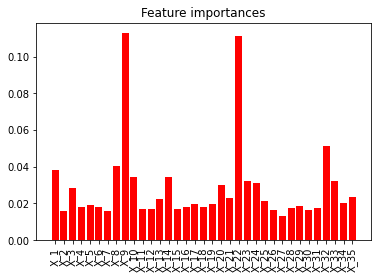

In [10]:
from matplotlib import pyplot as plt
plt.title("Feature importances")
plt.bar(train_df.drop(target, axis=1).columns, rf_classifier.feature_importances_, color="r", align="center")

plt.xticks(rotation=90)


In [18]:
# balance the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
sm = SMOTE(random_state=42)

train_df_rus, target_df_rus = rus.fit_resample(train_df.drop([target], axis=1), train_df[target])
train_df_sm, target_df_sm = sm.fit_resample(train_df.drop([target], axis=1), train_df[target])

rf_classifier.fit(train_df_rus, target_df_rus)
knn_classifier.fit(train_df_rus, target_df_rus)
ada_boost_classifier.fit(train_df_rus, target_df_rus)

rf_pred = rf_classifier.predict(test_df.drop([target], axis=1))
knn_pred = knn_classifier.predict(test_df.drop([target], axis=1))
ada_pred = ada_boost_classifier.predict(test_df.drop([target], axis=1))

print("RF Accuracy:", accuracy_score(test_df[target], rf_pred))
print("KNN Accuracy:", accuracy_score(test_df[target], knn_pred))
print("Ada Boost Accuracy:", accuracy_score(test_df[target], ada_boost_pred))



RF Accuracy: 0.791
KNN Accuracy: 0.709
Ada Boost Accuracy: 0.6953333333333334
